In [27]:
#%pip install ace-tools-open
#%pip install numpy
#%pip install pandas
#%pip install matplotlib

In [1]:
import random
import pandas as pd # type: ignore
import ace_tools_open as tools # type: ignore
import numpy as np # type: ignore
import math
import matplotlib.pyplot as plt # type: ignore

Students Efficiency Simulation


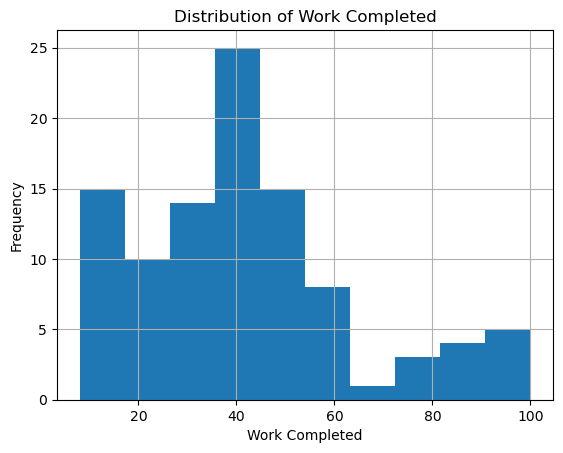

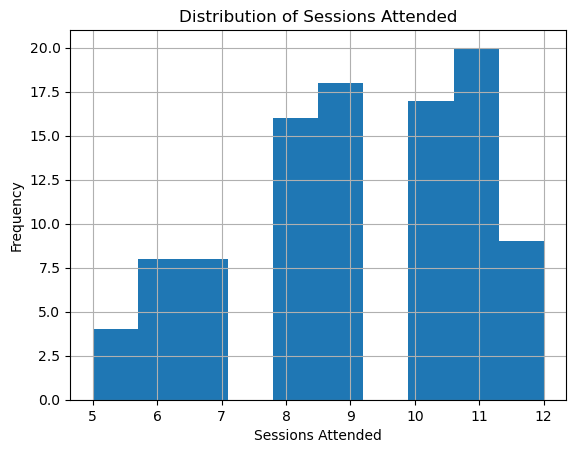

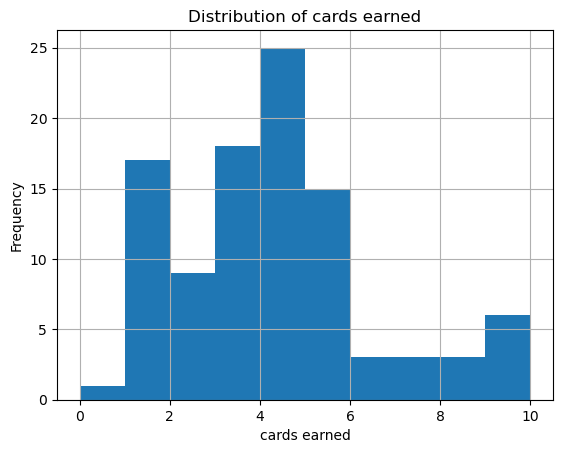

In [2]:
import numpy as np
import pandas as pd

# Number of students
n_students = 100

# Grouping students into efficiency levels
high_efficiency_pct = 0.2  # 20% high-efficiency students
low_efficiency_pct = 0.2   # 20% low-efficiency students
average_efficiency_pct = 0.6  # 60% average-efficiency students

# Assign students to efficency groups
efficiency_labels = (
    ["high"] * int(n_students * high_efficiency_pct) + 
    ["average"] * int(n_students * average_efficiency_pct) + 
    ["low"] * int(n_students * low_efficiency_pct)
)
np.random.shuffle(efficiency_labels)  # Shuffle so they're randomly assigned

# Define work completion distributions per efficiency level
efficiency_params = {
    "high": {"mean": 9, "std": 1},   # High-efficiency: 9 work units per day
    "average": {"mean": 5, "std": 1.5},  # Average: 5 work units per day
    "low": {"mean": 2, "std": 1}     # Low-efficiency: 2 work unit per day
}

# Simulating student behavior
students = []

for student_id, efficiency in enumerate(efficiency_labels, start=1):
    # Get the mean and std for this student's efficiency group
    mean_work = efficiency_params[efficiency]["mean"]
    std_dev_work = efficiency_params[efficiency]["std"]
    
    #Simulate number of sessions attended in 4 weeks at a max of 3 times per week
    sessions_per_week = np.random.poisson(lam=3, size=4)  # 4 weeks
    sessions_per_week = np.clip(sessions_per_week, 0, 3)  # Cap at max 3 per week
    total_sessions_attended = np.sum(sessions_per_week)

    # Simulate total work completed over the total sessions they attended
    work_completed = np.clip(np.random.normal(loc=mean_work, scale=std_dev_work, size=total_sessions_attended), 0, None).astype(int)
    
    # Sum up total work for the month
    total_work_completed = np.sum(work_completed)
    
    #Calculate cards earned: Need 10 completed work units per card
    cards_earned = math.trunc(total_work_completed/10)

    willingness_to_spend = np.random.normal(loc = .6, scale=0.2)
    willingness_to_spend = np.clip(willingness_to_spend, 0.0, 1.0)

    # Store student data
    students.append({
        "Student_ID": student_id,
        "Efficiency_Group": efficiency,
        "Work_Completed": total_work_completed,
        "Sessions_Attended": total_sessions_attended,
        "Cards_Earned": cards_earned,
        "Willingness_to_Spend" : willingness_to_spend
    })

# Convert to DataFrame
students_df = pd.DataFrame(students)

# Display the updated student simulation data

tools.display_dataframe_to_user(name="Students Efficiency Simulation", dataframe=students_df)

#work completed histogram
students_df['Work_Completed'].hist()
plt.title("Distribution of Work Completed")
plt.xlabel("Work Completed")
plt.ylabel("Frequency")
plt.show()

#sessions attended histogram
students_df['Sessions_Attended'].hist()
plt.title("Distribution of Sessions Attended")
plt.xlabel("Sessions Attended")
plt.ylabel("Frequency")
plt.show()

#cards earned histogram
students_df['Cards_Earned'].hist()
plt.title("Distribution of cards earned")
plt.xlabel("cards earned")
plt.ylabel("Frequency")
plt.show()